In [49]:
import scipy.io
import numpy as np
import pandas as pd

!pip install opencv-python
import cv2

import glob

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# Import classifiers
from sklearn import svm
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
# metrics contain our plot_confustion_matrix and classification_report
from sklearn import metrics

# Helper fuction to splitting data
from sklearn.model_selection import train_test_split



In [ ]:
#importing images with glob 

#pip install opencv-python
import cv2
import glob

imdir = 'aligned/'

files = []
[files.extend(glob.glob(imdir + '*.jpg'))] #arbitrary ordering of files 
files = sorted(files) # to get back file ordering
images = [cv2.imread(file) for file in files]


files_df = pd.DataFrame(files)

files_df.set_axis(['file_name'], axis =1 , inplace = True )

replace = ['aligned/', '_aligned' ]

files_df['file_name'] = files_df['file_name'].replace(replace , '' , regex = True )


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

cv2.cvtColor(images[0], cv2.COLOR_BGR2GRAY)

images_gray = [cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY) for i in range(len(images)) ]


#plt.imshow(images_gray[0], cmap = 'gray') display image 

print( 'rbg shape:' , images[0].flatten().shape , 'gray shape:', images_gray[0].flatten().shape)

flatten_gray = [images_gray[i].flatten() for i in range(len(images_gray))]

flatten_df = pd.DataFrame(flatten_gray)

flatten_df.insert(0, 'file_name' , files_df)

In [ ]:
import pandas as pd

df_list_patition_label = pd.read_csv("list_patition_label.txt", sep = " ", header = None) #Reading the file list_partition_label; make sure to have this file in the same folder as the python code file

#class_balance = df.groupby(1).nunique()
#class_balance.columns = ["Count"]
#class_balance

df_list_patition_label.set_axis(['file_name', 'expressions'], axis =1 , inplace = True )


In [ ]:
result = pd.merge(df_list_patition_label, flatten_df , on='file_name')

result

In [ ]:
result.to_csv(r'Facial_Expression_DF.csv', index = False)

In [2]:
df = pd.read_csv('Facial_Expression_DF.csv')

classes = {1: 'suprise', 2: 'fear', 3: 'disgust' , 4: 'happiness', 5: 'sadness', 6: 'anger', 7 : 'neutral'}

df['expressions'] = df['expressions'].map(classes) #intger label to cat labes 

df = df.drop('file_name', axis = 1 )
df.head()

,expressions,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,sadness,71,101,74,66,82,55,84,50,41,...,173,174,174,173,173,172,173,175,177,177
1,sadness,11,11,37,1,12,27,32,35,44,...,31,33,17,17,18,24,10,13,18,23
2,happiness,9,13,14,14,22,32,30,20,12,...,215,215,215,215,215,215,213,213,213,212
3,happiness,50,33,17,20,36,50,50,45,38,...,224,222,219,215,213,212,213,211,207,204
4,sadness,23,20,21,29,39,43,38,30,23,...,52,64,79,103,165,208,227,160,159,177


In [7]:
#check for nulls
#df.isnull().sum().sum() #0
#check for dups
df.duplicated().sum() #3
df.drop_duplicates()

,expressions,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,sadness,71,101,74,66,82,55,84,50,41,...,173,174,174,173,173,172,173,175,177,177
1,sadness,11,11,37,1,12,27,32,35,44,...,31,33,17,17,18,24,10,13,18,23
2,happiness,9,13,14,14,22,32,30,20,12,...,215,215,215,215,215,215,213,213,213,212
3,happiness,50,33,17,20,36,50,50,45,38,...,224,222,219,215,213,212,213,211,207,204
4,sadness,23,20,21,29,39,43,38,30,23,...,52,64,79,103,165,208,227,160,159,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15334,neutral,145,93,103,116,94,90,106,129,132,...,73,85,80,56,32,20,34,43,51,47
15335,neutral,97,99,120,153,170,168,172,184,185,...,60,76,77,70,73,80,85,83,76,68
15336,neutral,49,47,49,54,61,65,63,60,65,...,38,40,42,42,40,37,35,37,39,42
15337,neutral,146,148,149,150,150,152,155,158,161,...,119,121,123,125,128,131,130,130,129,129


#### Expressions Classes 

surprise = 1, fear = 2 , disgust = 3 , happiness = 4 , sadness = 5 , anger = 6 and neutral = 7

In [9]:
#class balance 
df.expressions.value_counts(), df.expressions.value_counts(normalize=True)

(happiness    5957
 neutral      3204
 sadness      2460
 suprise      1619
 disgust       877
 anger         867
 fear          355
 Name: expressions, dtype: int64,
 happiness    0.388356
 neutral      0.208879
 sadness      0.160376
 suprise      0.105548
 disgust      0.057175
 anger        0.056523
 fear         0.023144
 Name: expressions, dtype: float64)

In [10]:
#taking out classes with that have counts less than 2.4k 

# if value_counts <= 2000 remove from df....
condition = ['happiness', 'sadness', 'neutral']

df2 = df[df.expressions.isin(condition)]
df2.expressions.value_counts(normalize=True)


happiness    0.512606
neutral      0.275708
sadness      0.211686
Name: expressions, dtype: float64

In [11]:
sampled_happiness = df2[df2['expressions'] == 'happiness'].sample(n = 3000)
sampled_neutral = df2[df2['expressions'] == 'neutral'].sample(n = 3000)
sadness =  df2[df2['expressions'] == 'sadness']

balanced_df = sadness.append([sampled_happiness, sampled_neutral], ignore_index = True)

happy_neutral = sampled_happiness.append(sampled_neutral, ignore_index = True)
happy_sad = sampled_happiness.append(sadness, ignore_index = True )

In [12]:
from sklearn.utils import shuffle

balanced_df = shuffle(balanced_df)
happy_neutral =shuffle(happy_neutral)
happy_sad= shuffle(happy_sad)

happy_sad.expressions.value_counts(normalize = True)


happiness    0.549451
sadness      0.450549
Name: expressions, dtype: float64

In [39]:
def build_and_eval_model(model,df,name,  random_state=23):
    print("Running report for model:", model , 'and DF:' , name)
   
    selected_features = df.columns
    # print(type(selected_features)) = <class 'pandas.core.indexes.base.Index'>
    selected_features = list(selected_features) # a list of all the cols

    #remove the file_name and the expressions col (our y value)
    selected_features.remove('expressions')
    # selected_features #0-999 pixels of the image
    
    
    X = df[selected_features]
    y = df['expressions']
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=random_state)    
    
    #Normalize pixels 
    X_train = X_train / 255
    X_test = X_test / 255
    
    # Fit our model.
    model.fit(X_train, y_train)
    
    # Get the accuracy
    accuracy = model.score(X_test, y_test)
    print("\n\nAccuracy %f" % accuracy , 'for model: ' , model)
    
    
    # Make new predictions
    y_pred = model.predict(X_test)
    
    
    # Print the classification report. 
    print(metrics.classification_report(y_test, y_pred))
    
    title = 'confusion matrix for model: '+ str(model)
       
    # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=(13,13))
    plt.title(title)
   
    metrics.plot_confusion_matrix(estimator=model, 
                                  X=X_test, 
                                  y_true=y_test, 
                                  ax=ax)
    

    # Return the fitted model. 
    return model

In [28]:
rf = RandomForestClassifier()
mnb = MultinomialNB()
#svm_model = svm.SVC()
lr = LogisticRegression()

models = [rf, mnb, lr]


Running report for model: RandomForestClassifier() and DF: Balanced df


Accuracy 0.689835 for model:  RandomForestClassifier()
              precision    recall  f1-score   support

   happiness       0.75      0.80      0.77       724
     neutral       0.68      0.76      0.72       803
     sadness       0.60      0.46      0.52       588

    accuracy                           0.69      2115
   macro avg       0.68      0.67      0.67      2115
weighted avg       0.68      0.69      0.68      2115

Running report for model: MultinomialNB() and DF: Balanced df


Accuracy 0.536170 for model:  MultinomialNB()
              precision    recall  f1-score   support

   happiness       0.63      0.59      0.61       724
     neutral       0.58      0.50      0.54       803
     sadness       0.41      0.52      0.46       588

    accuracy                           0.54      2115
   macro avg       0.54      0.54      0.53      2115
weighted avg       0.55      0.54      0.54      2115



C:\Users\Laptop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(




Accuracy 0.745626 for model:  LogisticRegression()
              precision    recall  f1-score   support

   happiness       0.81      0.85      0.83       724
     neutral       0.76      0.73      0.75       803
     sadness       0.64      0.63      0.64       588

    accuracy                           0.75      2115
   macro avg       0.74      0.74      0.74      2115
weighted avg       0.74      0.75      0.74      2115



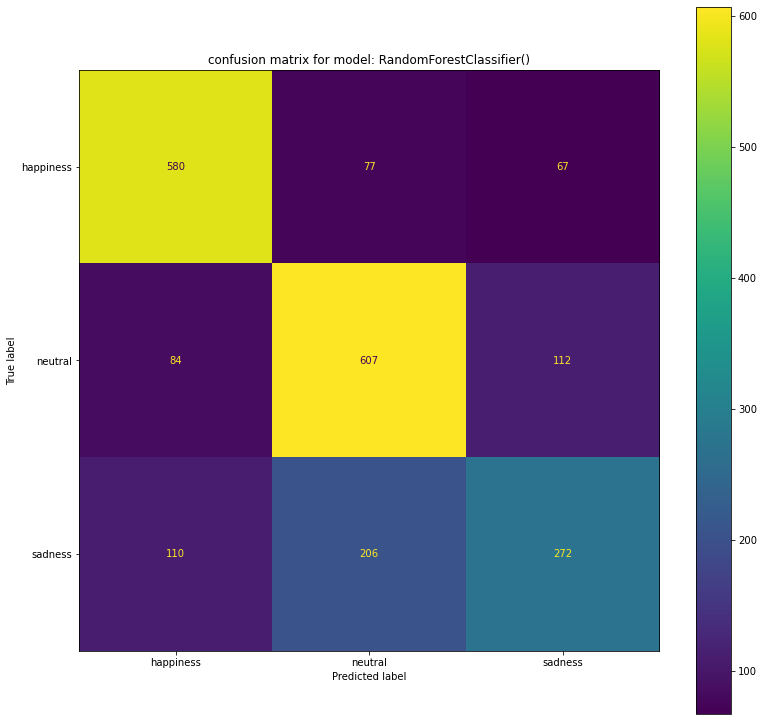

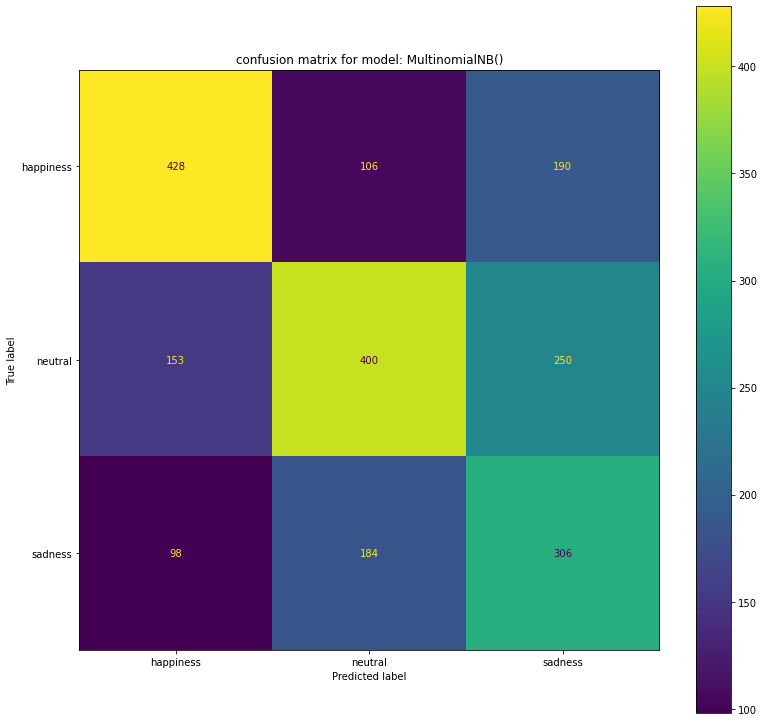

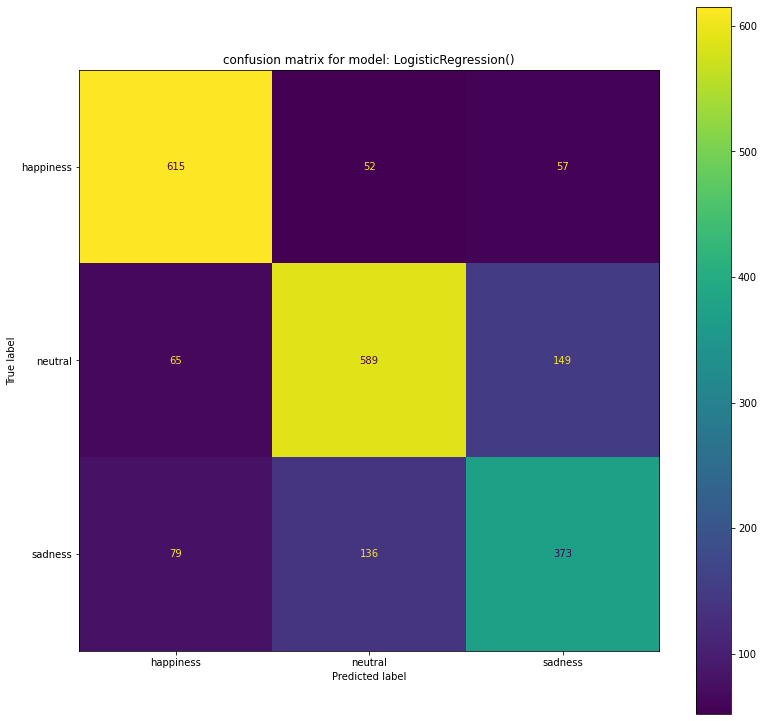

In [40]:
for model in models:
    build_and_eval_model(model, balanced_df, "Balanced df")

Running report for model: RandomForestClassifier() and DF: Happy vs Neutral DF


Accuracy 0.870667 for model:  RandomForestClassifier()
              precision    recall  f1-score   support

   happiness       0.87      0.87      0.87       725
     neutral       0.88      0.87      0.87       775

    accuracy                           0.87      1500
   macro avg       0.87      0.87      0.87      1500
weighted avg       0.87      0.87      0.87      1500

Running report for model: MultinomialNB() and DF: Happy vs Neutral DF


Accuracy 0.778000 for model:  MultinomialNB()
              precision    recall  f1-score   support

   happiness       0.76      0.80      0.78       725
     neutral       0.80      0.76      0.78       775

    accuracy                           0.78      1500
   macro avg       0.78      0.78      0.78      1500
weighted avg       0.78      0.78      0.78      1500

Running report for model: LogisticRegression() and DF: Happy vs Neutral DF


C:\Users\Laptop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(




Accuracy 0.886000 for model:  LogisticRegression()
              precision    recall  f1-score   support

   happiness       0.87      0.90      0.88       725
     neutral       0.90      0.87      0.89       775

    accuracy                           0.89      1500
   macro avg       0.89      0.89      0.89      1500
weighted avg       0.89      0.89      0.89      1500



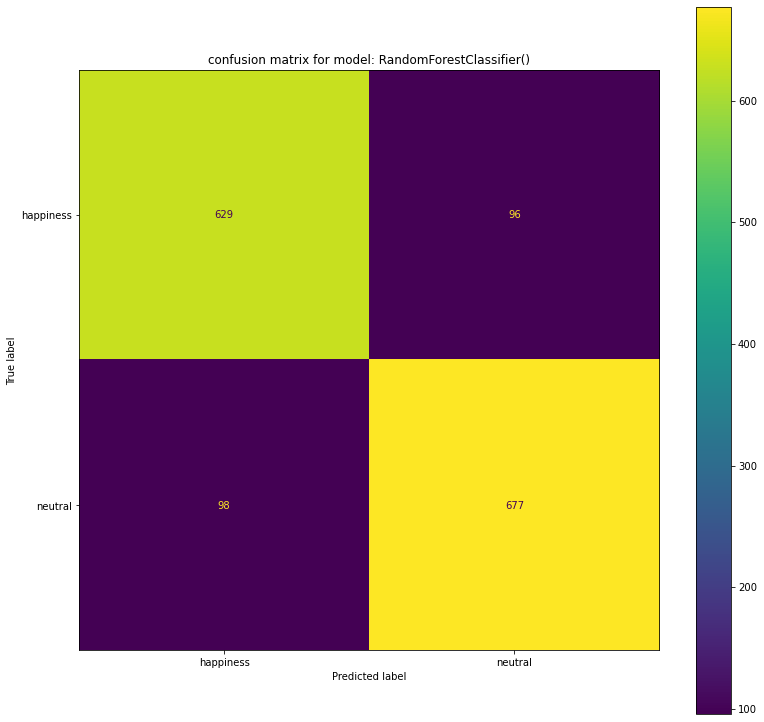

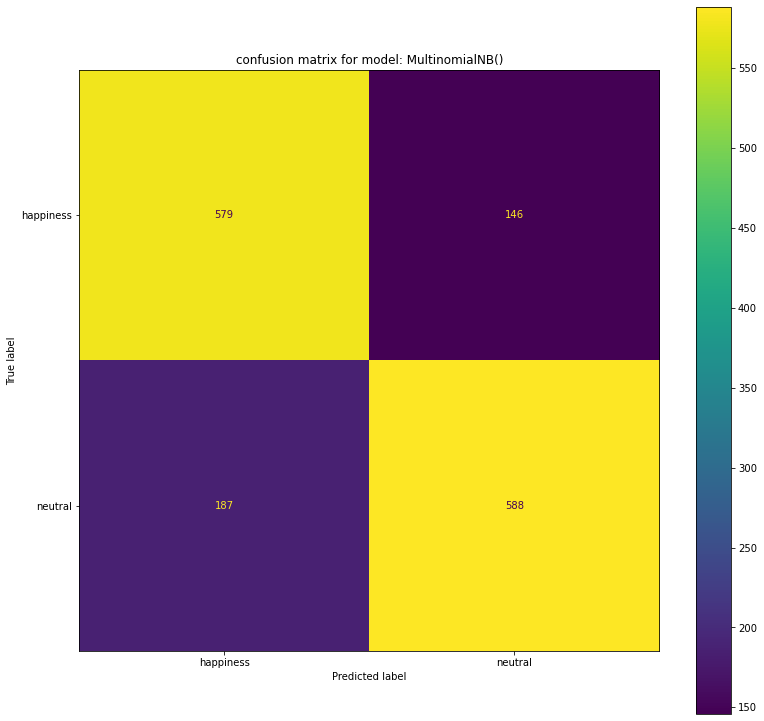

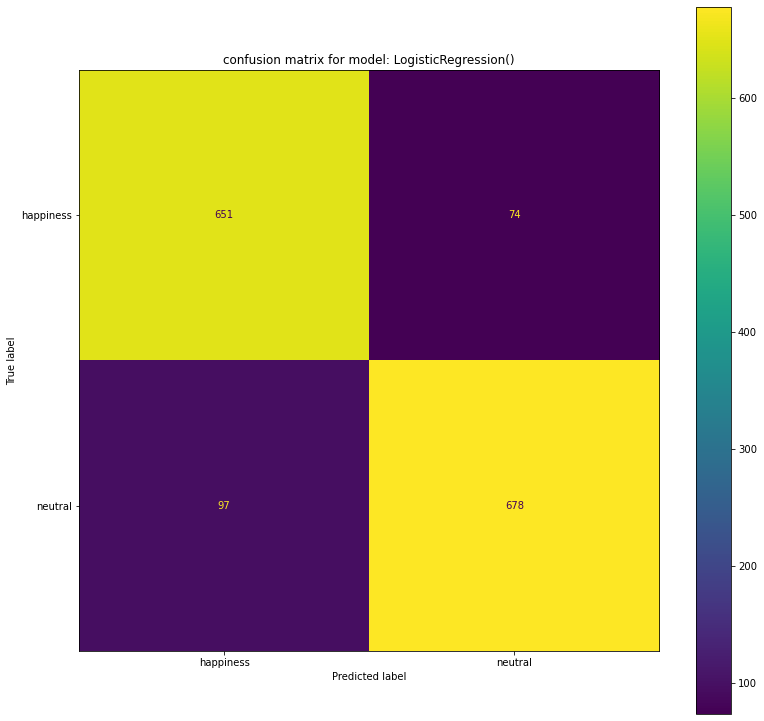

In [41]:
for model in models:
    build_and_eval_model(model, happy_neutral, "Happy vs Neutral DF")

Running report for model: RandomForestClassifier() and DF: Happy vs Sad DF


Accuracy 0.819780 for model:  RandomForestClassifier()
              precision    recall  f1-score   support

   happiness       0.83      0.84      0.84       759
     sadness       0.80      0.79      0.80       606

    accuracy                           0.82      1365
   macro avg       0.82      0.82      0.82      1365
weighted avg       0.82      0.82      0.82      1365

Running report for model: MultinomialNB() and DF: Happy vs Sad DF


Accuracy 0.702564 for model:  MultinomialNB()
              precision    recall  f1-score   support

   happiness       0.75      0.70      0.72       759
     sadness       0.65      0.71      0.68       606

    accuracy                           0.70      1365
   macro avg       0.70      0.70      0.70      1365
weighted avg       0.71      0.70      0.70      1365

Running report for model: LogisticRegression() and DF: Happy vs Sad DF


C:\Users\Laptop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(




Accuracy 0.851282 for model:  LogisticRegression()
              precision    recall  f1-score   support

   happiness       0.86      0.87      0.87       759
     sadness       0.84      0.82      0.83       606

    accuracy                           0.85      1365
   macro avg       0.85      0.85      0.85      1365
weighted avg       0.85      0.85      0.85      1365



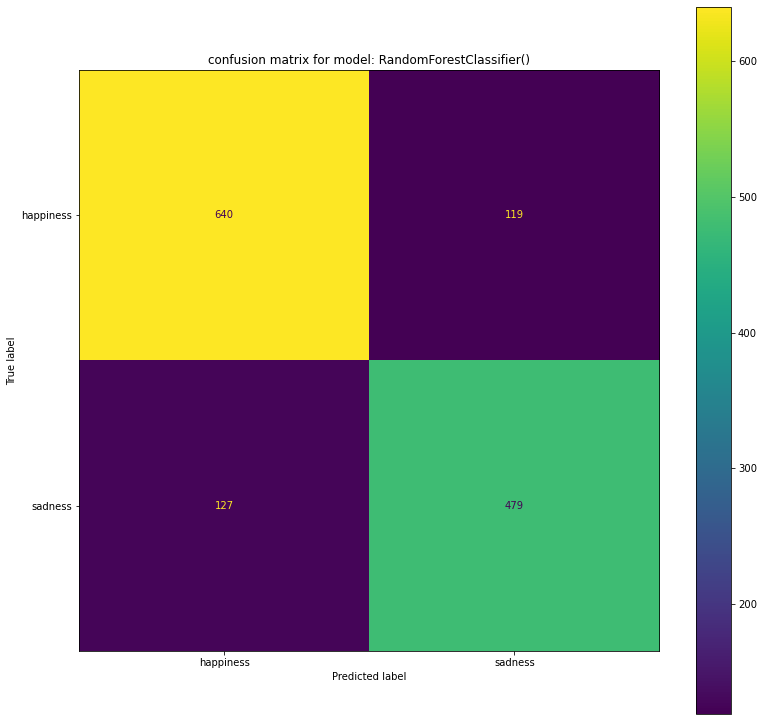

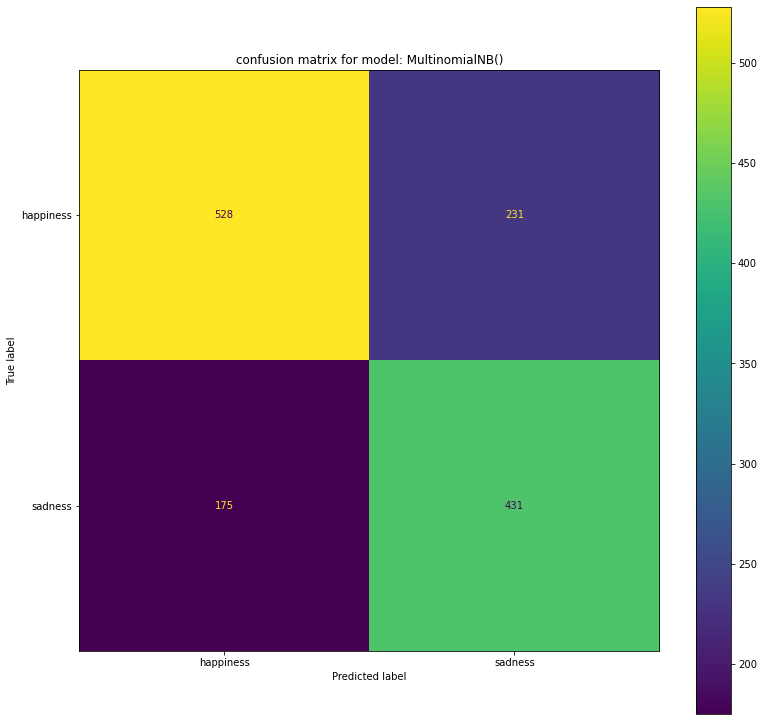

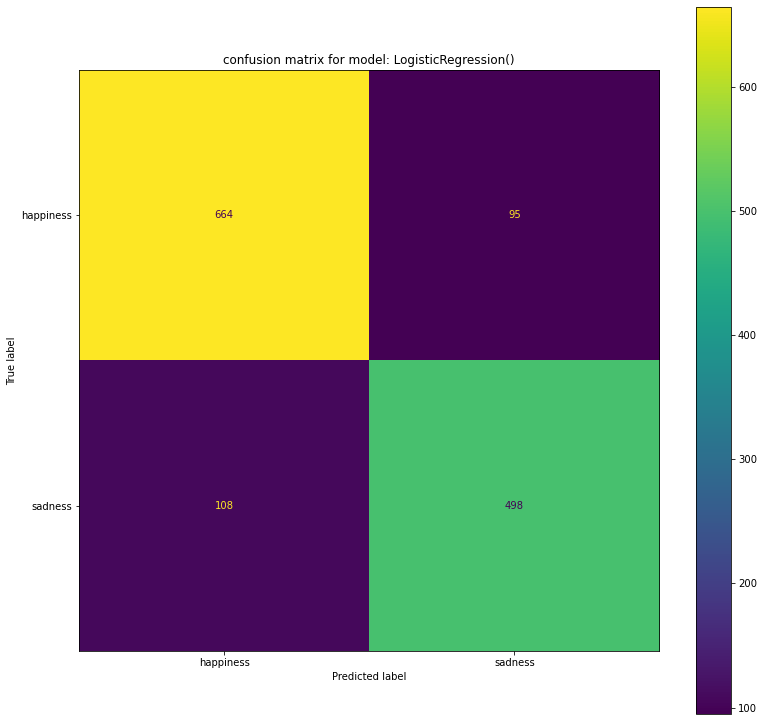

In [42]:
for model in models:
    build_and_eval_model(model, happy_sad, "Happy vs Sad DF")

In [ ]:
#DOESNT WORK

svm = svm.SVC()
build_and_eval_model(svm, X, y)


In [50]:
# TensorFlow and tf.keras
#!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
# Layers for our neural networks
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
# A pretrained model for transfer learning
from keras.models import Model
from keras.applications import vgg19

# Our normal python data science stack you've come to know and love
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets

print(tf.__version__)

2.7.0


In [55]:
cnn_df = happy_sad
len(cnn_df)
selected_features = cnn_df.columns
selected_features = list(selected_features) 

    
selected_features.remove('expressions')

    
cnn_x = cnn_df[selected_features]
cnn_y = cnn_df['expressions']
    
cnn_x_train, cnn_x_test, cnn_y_train, cnn_y_test = train_test_split(cnn_x, cnn_y, test_size=0.25, random_state= 43)    
    
# divide the values by 255 and reshape 
cnn_x_train = cnn_x_train / 255
cnn_x_test = cnn_x_test / 255

cnn_x_train = cnn_x_train.reshape(-1, 100, 100, 1)
cnn_y_train = cnn_y_train.reshape(-1)

cnn_x_test = cnn_x_test.reshape(-1, 100, 100, 1)
cnn_y_test = cnn_y_test.reshape(-1)  

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [ ]:



model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(input_shape=(100,100, 1),filters=100,kernel_size=(3,3), strides=(1,1), activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=100,kernel_size=(3,3), strides=(1,1), activation="relu"))
model.add(tf.keras.layers.MaxPool2D(2, 2))

model.add(tf.keras.layers.Conv2D(filters=100,kernel_size=(3,3), strides=(1,1), activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=100,kernel_size=(3,3), strides=(1,1), activation="relu"))
model.add(tf.keras.layers.MaxPool2D(2, 2))


model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(10000, activation='relu'))
model.add(tf.keras.layers.Dense(5000, activation='relu'))
model.add(tf.keras.layers.Dense(1000, activation='relu'))
model.add(tf.keras.layers.Dense(500, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

In [ ]:
# compile your model

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
# fit your model

epochs = 6
model.fit(cnn_x_train, cnn_y_train, epochs=epochs, validation_split=0.2)


In [ ]:
# evaluate your results

model.evaluate(cnn_x_test, cnn_y_test)

In [ ]:
# extra features from mathlab files 

HOG = scipy.io.loadmat('HOG.mat') 
DLP_CNN = scipy.io.loadmat('DLP-CNN.mat')
baseDCNN = scipy.io.loadmat('baseDCNN.mat')
Gabor = scipy.io.loadmat('Gabor.mat') 


Gabor_train = pd.DataFrame(Gabor['GAB_train'])
Gabor_train

Gabor_test = pd.DataFrame(Gabor['GAB_test'])
Gabor_test

baseDCNN_train = pd.DataFrame(baseDCNN['baseDCNN_train'])
baseDCNN_train

baseDCNN_test = pd.DataFrame(baseDCNN['baseDCNN_test'])
baseDCNN_tes

HOG_train = pd.DataFrame(HOG['HOG_train'])
HOG_train

HOG_test = pd.DataFrame(HOG['HOG_test'])
HOG_test

DLP_CNN_train = pd.DataFrame(DLP_CNN['DLP_train'])
DLP_CNN_train

DLP_CNN_test = pd.DataFrame(DLP_CNN['DLP_test'])
DLP_CNN_test

